# Linear Regression Exercises

## Imports

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

## Problem 1 - Running Gradient Descent on Cost Function of Univariate Linear Regression

### Mean Squared Error: a cost function for regression problems

### $$MSE = \frac{1}{n} \sum_{i=1}^{n} \big( y^{(i)} - \theta_0 - \theta_1.x^{(i)} \big)^2 $$


### Partial Derivatives of MSE w.r.t. $\theta_0$ and $\theta_1$

## $$\frac{\partial MSE}{\partial \theta_0} = - \frac{2}{n} \sum_{i=1}^{n} \big( y^{(i)} - \theta_0 - \theta_1 x^{(i)} \big)$$

## $$\frac{\partial MSE}{\partial \theta_1} = - \frac{2}{n} \sum_{i=1}^{n} \big( y^{(i)} - \theta_0 - \theta_1 x^{(i)} \big) \big( x^{(i)} \big)$$

In [6]:
#Real data for x and y (dataset with n=7)
x_i = [0.1, 1.2, 2.4, 3.2, 4.1, 5.7, 6.5]
y_i = [1.7, 2.4, 3.5, 3.0, 6.1, 9.4, 8.2]

#Making data for theta_0 and theta_1
th_0 = np.linspace(start=-1, stop=3, num=200)
th_1 = np.linspace(start=-1, stop=3, num=200)
plot_t0, plot_t1 = np.meshgrid(th_0, th_1)

In [7]:
#The cost function - MSE
def mse(theta_0,theta_1):
    total=0
    for j in range(len(x_i)):
        total+=(y_i[j]-theta_0-theta_1*x_i[j])**2
    return total/(len(x_i))

#Partial derivative wrt theta_0
def pdtheta_0(theta_1,theta_0): 
    total=0
    for j in range(len(x_i)):
        total+=y_i[j]-theta_0-theta_1*x_i[j]
    return 2*total/(-len(x_i))

#Partial derivative wrt theta_1
def pdtheta_1(theta_1,theta_0):
    total=0
    for j in range(len(x_i)):
        total+=(y_i[j]-theta_0-theta_1*x_i[j])*x_i[j]
    return 2*total/(-len(x_i))

In [8]:
#Gradient descent implementation
learning_rate = 0.01
max_iter = 200
initial_theta_0 =1.18
initial_theta_1= 1

theta_0_old=initial_theta_0
theta_1_old=initial_theta_1

theta_0_list=[]
theta_1_list=[]
for i in range (1,max_iter+1):
    theta_0_new = theta_0_old - learning_rate * pdtheta_0(theta_0_old,theta_1_old)
    theta_1_new = theta_1_old - learning_rate * pdtheta_1(theta_0_old,theta_1_old)
    
    theta_0_list.append(theta_0_old)
    theta_1_list.append(theta_1_old)

    theta_0_old=theta_0_new
    theta_1_old=theta_1_new

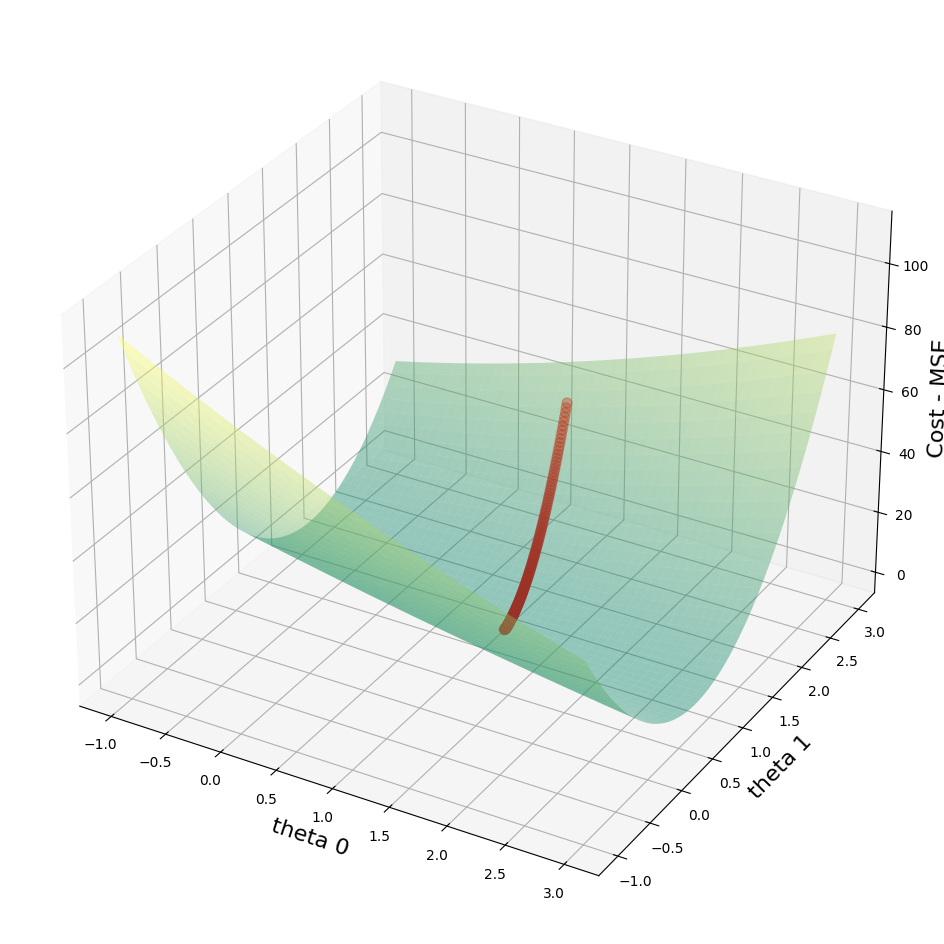

In [9]:
#Plotting a 3D graph
fig=plt.figure(figsize=[16,12])
ax=plt.axes(projection='3d')
ax.set_xlabel('theta 0', fontsize=16)
ax.set_ylabel('theta 1', fontsize=16)
ax.set_zlabel('Cost - MSE', fontsize=16)
ax.plot_surface(plot_t0, plot_t1, mse(plot_t0, plot_t1), alpha=0.4, cmap='summer')
ax.scatter(theta_0_list,theta_1_list,mse(np.array(theta_0_list),np.array(theta_1_list)), alpha=0.4, s=50, color='red')
plt.show()

## Problem 2: Making Predictions using the Movie Revenue Dataset
### An Example of Univariate Linear Regression

In [17]:
#Loading movie revenue dataset from csv
data=pd.read_csv('CLeanDatasets/D1_Movie_Revenue_Dataset_Clean.csv')
data

,Production_Budget,Worldwide_Gross
0,1100,181041
1,5000,1338
2,6000,240495
3,7000,900
4,7000,71644
...,...,...
5768,300000000,2044540523
5769,306000000,2064615817
5770,365000000,1395316979
5771,379000000,1045713802


In [18]:
#Separating the feature into variable X
X=data['Production_Budget'] #extracts column as a series
type(X)
X=data[['Production_Budget']] #extracts column as a dataframe
type(X)

pandas.core.frame.DataFrame

In [19]:
#Separating the target into variable X
Y=data[['Worldwide_Gross']]
type(Y)

pandas.core.frame.DataFrame

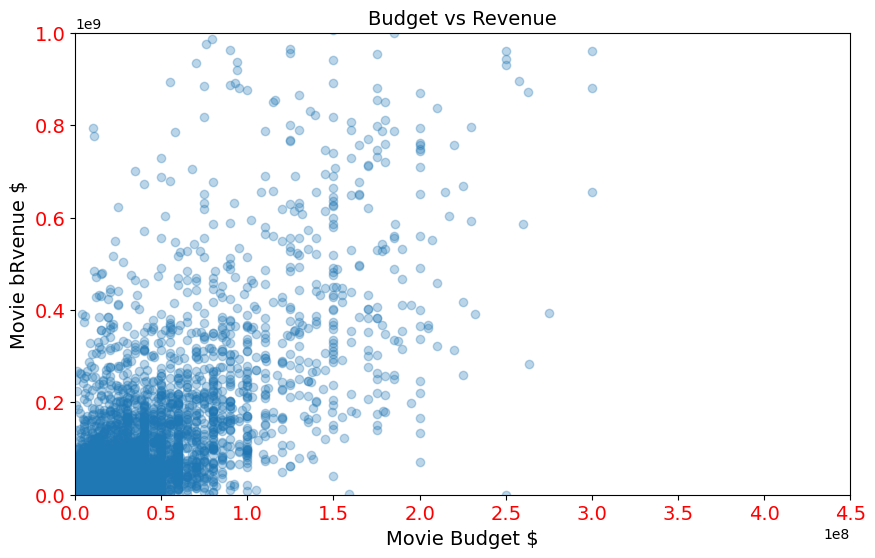

In [20]:
#Visualizing Data
plt.figure(figsize=(10,6))
plt.scatter(X,Y,alpha=0.3) #alpha sets transparency of dots
plt.title('Budget vs Revenue',fontsize=14)
plt.xlabel('Movie Budget $',fontsize=14)
plt.ylabel('Movie bRvenue $',fontsize=14)
plt.xticks(color='red',fontsize=14)
plt.yticks(color='red',fontsize=14)
plt.xlim(0,450000000)
plt.ylim(0,1000000000)
plt.show()

In [21]:
#Fitting Linear Regression Model
r=LinearRegression() #Creates an object of LinearRegression type
r.fit(X,Y) #Does the training to select optimal values of the parameters

LinearRegression()

In [22]:
#Reading values for parameters theta_0 and theta_1

#theta_0
t0=r.intercept_[0]  
#theta_1
t1=r.coef_[0][0]  
print('theta_0:',t0)
print('theta_1:',t1)

theta_0: -8702395.435496658
theta_1: 3.20613539914921


In [23]:
#Reading R-square value (the goodness of fit)
r.score(X,Y)

0.5455936700827256

In [24]:
#Making predictions

#Approach 1: Using the equation of linear regression
y=t0+t1*5000000
print('Prediction 1:',y)

#Approach 2: Using the predict method
y=r.predict(pd.DataFrame([5000000]))
print('Prediction 2:',y)

Prediction 1: 7328281.560249392
Prediction 2: [[7328281.56024939]]


/Users/aqibaabdulqadir/Desktop/MachineLearning/.venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [25]:
#Making predictions for the whole dataset
y=r.predict(X)
y

array([[-8.69886869e+06],
       [-8.68636476e+06],
       [-8.68315862e+06],
       ...,
       [ 1.16153703e+09],
       [ 1.20642292e+09],
       [ 1.27375176e+09]], shape=(5773, 1))

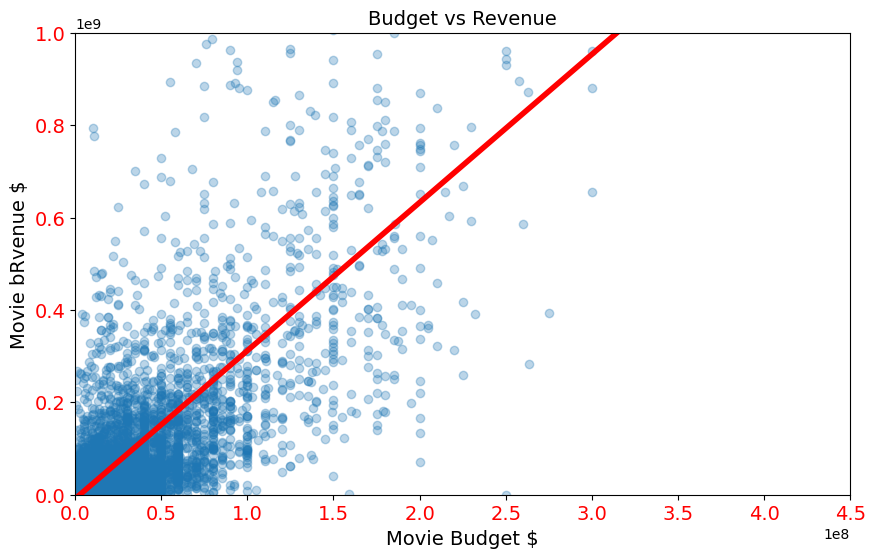

In [26]:
#Plotting the fit line over the scatter plot
plt.figure(figsize=(10,6))
plt.scatter(X,Y,alpha=0.3)
plt.title('Budget vs Revenue',fontsize=14)
plt.xlabel('Movie Budget $',fontsize=14)
plt.ylabel('Movie bRvenue $',fontsize=14)
plt.xticks(color='red',fontsize=14)
plt.yticks(color='red',fontsize=14)
plt.xlim(0,450000000)
plt.ylim(0,1000000000)
plt.plot(X,r.predict(X),color='red',linewidth=4)
plt.show()

### An Altenate Model
### Applying Data Split

In [27]:
X_train,X_test,Y_train,Y_test = train_test_split(X, Y,test_size=0.2,random_state=0)
print('Size of original dataset (complete):',len(X))
print('Size of train dataset (80%):',len(X_train))
print('Size of test dataset (20%):',len(X_test))

Size of original dataset (complete): 5773
Size of train dataset (80%): 4618
Size of test dataset (20%): 1155


In [28]:
#Let us now fit the model on train data and then check the r_squared value of both train and test sets
r2=LinearRegression()
r2.fit(X_train,Y_train)
print(r2.score(X_train,Y_train))
print(r2.score(X_test,Y_test))

0.5386725279898879
0.570740693485065


## Problem 3: Making Predictions using the Boston Housing Dataset
### An Example of Multivariable Linear Regression

Refer to notebook 'N4_Data Preprocessing and Feature Engineeing_4.ipynb' for preliminary details on this dataset.

In [31]:
#Loading the dataset from the csv file
boston_dataset = pd.read_csv('Datasets/Boston_Dataset.csv')
boston_dataset

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [32]:
#Creating a series for the target
target=boston_dataset['PRICE']
target

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: PRICE, Length: 506, dtype: float64

In [33]:
#Creating a dataframe for the features
features=boston_dataset.drop(['PRICE'],axis=1)
features

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48


In [34]:
#Splitting sataset into train and test parts
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=10)

### TASK FOR YOU
Find sizes of train and test sets and verify if the split is actually 80%-20%.

In [35]:
#Running multivariable linear regression
regr = LinearRegression()
regr.fit(X_train, y_train)

print('Training data r-square:', regr.score(X_train, y_train))
print('Test data r-square:', regr.score(X_test, y_test))

print('Intercept', regr.intercept_)

#Regression coefficients for all features
pd.DataFrame(data=regr.coef_, index=X_train.columns, columns=['coef'])

Training data r-square: 0.750121534530608
Test data r-square: 0.6709339839115637
Intercept 36.53305138282437


,coef
CRIM,-0.128181
ZN,0.063198
INDUS,-0.007576
CHAS,1.974515
NOX,-16.271989
RM,3.108456
AGE,0.016292
DIS,-1.483014
RAD,0.303988
TAX,-0.012082


## Testing Significance of a Feature using p_values

- There is no direct method in sklearn package to find p_values, so we are using another package called statsmodel for this purpose.
- We will have to run the model fitting again using this new package.


In [36]:
#Reproducing the same results using statsmodel package
X_incl_const = sm.add_constant(X_train)# this is to add an additional row for constant (theta_0)

alternate_model = sm.OLS(y_train, X_incl_const)
results = alternate_model.fit()

#Finding p-values
pd.DataFrame({'coef': results.params, 'p-value': round(results.pvalues, 3)})
#Note that the coefficent values are same as the first model m1. Row one shows the value for theta_0.

,coef,p-value
const,36.533051,0.000
CRIM,-0.128181,0.000
ZN,0.063198,0.000
INDUS,-0.007576,0.905
CHAS,1.974515,0.033
NOX,-16.271989,0.000
RM,3.108456,0.000
AGE,0.016292,0.262
DIS,-1.483014,0.000
RAD,0.303988,0.000


- We know from theory class, if p-value of a feature is < 0.05 then it is significant, otherwise not.
- So we conclude from the above results that INDUS and AGE are the two features which might not be significant to the model.

## Testing for Multicollinearity

### Approach 1: Finding correlations among variables

In [37]:
#Finding correlations between the features and target - tabular form
features.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993


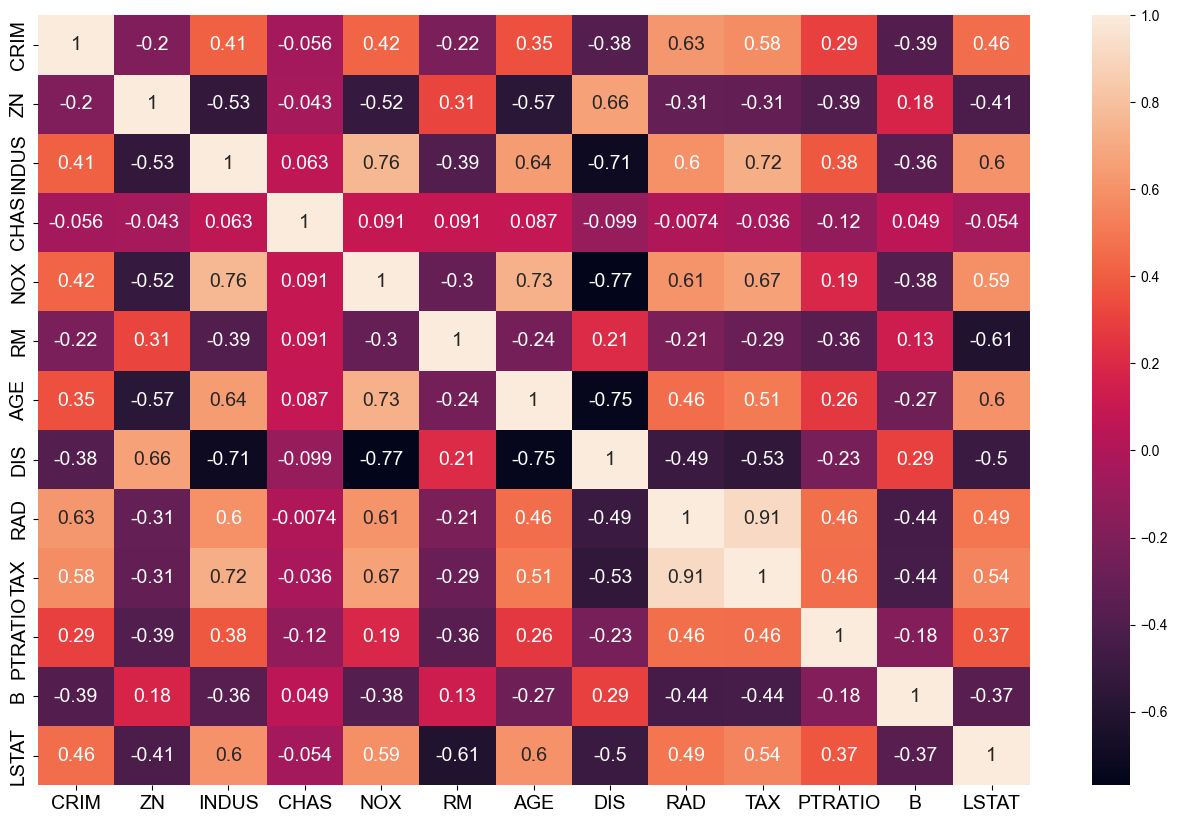

In [38]:
#Finding correlations between the features and target - graphical heatmap
plt.figure(figsize=(16,10))
sns.heatmap(features.corr(),  annot=True, annot_kws={"size": 14})
sns.set_style('white')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

We conclude the following high correlations may possibly cause multicollinearity:
- between TAX and RAD
- between DIS and NOX
- between DIS and INDUS
- between DIS and AGE

### Approach 2: Finding variance inflation factors
- Variance Inflation Factor (VIF) can also be reviewed for detection of multicollineairy.
- This was not discussed in the topic 'Data Preprocessing and Feature Engineering', as its evaluation requires understanding of linear regression.

Description:
- VIF measures how much of the variation in one variable is explained by the other variable.
- This is done by running a regression using one of the correlated features as the dependent variable against the other variables as predictor variables.
- The VIF value can be interpreted as follows:
   
   If VIF = 1, no correlation exists
   
   If VIF is between 1 and 5, moderate correlation exists
   
   If VIF is between 5 and 10, high correlation exists
   
   If VIF value is >10 then it is problematic.
   
Formula:
$$ VIF _{TAX} = \frac{1}{(1 - R ^ 2)} $$	

- Since it is calculated separately for each feature, the following is the calculation of VIF for TAX 
$$ TAX = \alpha _0 + \alpha _1 RM + \alpha _2 NOX + ... + \alpha _{12}LSTAT $$

$$ VIF _{TAX} = \frac{1}{(1 - R _{TAX} ^ 2)} $$	


In [39]:
#Finding VIF for 'TAX'
#This method is also from statsmodel package
variance_inflation_factor(exog=X_incl_const.values, exog_idx=10) 
#X_incl_const.values gives ndarray version of the dataframe

np.float64(8.508856493040817)

In [40]:
#Finding VIF for all columns
vif = [] # empty list
for i in range(X_incl_const.shape[1]):
    vif.append(variance_inflation_factor(exog=X_incl_const.values, exog_idx=i))
print(vif)

[np.float64(597.5487126763895), np.float64(1.7145250443932492), np.float64(2.3328224265597597), np.float64(3.943448822674636), np.float64(1.0788133385000576), np.float64(4.410320817897635), np.float64(1.8404053075678573), np.float64(3.3267660823099394), np.float64(4.222923410477865), np.float64(7.314299817005058), np.float64(8.508856493040817), np.float64(1.839911632651406), np.float64(1.3386713255364715), np.float64(2.812544292793036)]


We conclude that the following two values are high and show possible signs of multicollinearity:
- 7.314299817005058, corresponds to feature RAD
- 8.508856493040817, corresponds to feature TAX

### Summarizing
- Possible insignificant features: INDUS and AGE

- Features exhibiting signs of multicollinearity: TAX and RAD (as these were indicated by both methods)


- Now let's drop these features one by one and see the results.
- That means we will create different models with different subset of features, selecting the best model as the final one.

In [41]:
#Model 1: with all the 13 features
m1 = LinearRegression()
m1.fit(X_train, y_train)
print('With all 13 features:')
print('Training data r-squared:', m1.score(X_train, y_train))
print('Test data r-squared:', m1.score(X_test, y_test))

#Model 2: dropping 'AGE' and 'INDUS'
X_train2=X_train.drop(['AGE','INDUS'],axis=1)
X_test2=X_test.drop(['AGE','INDUS'],axis=1)
m2 = LinearRegression()
m2.fit(X_train2, y_train)
print('\nDropping AGE and INDUS:')
print('Training data r-squared:', m2.score(X_train2, y_train))
print('Test data r-squared:', m2.score(X_test2, y_test))

#Model 3: dropping 'RAD' and 'TAX'
X_train3=X_train.drop(['RAD','TAX'],axis=1)
X_test3=X_test.drop(['RAD','TAX'],axis=1)
m3 = LinearRegression()
m3.fit(X_train3, y_train)
print('\nDropping RAD and TAX:')
print('Training data r-squared:', m3.score(X_train3, y_train))
print('Test data r-squared:', m3.score(X_test3, y_test))

#Model 4: dropping 'RM'
X_train3=X_train.drop(['RM'],axis=1)
X_test3=X_test.drop(['RM'],axis=1)
m3 = LinearRegression()
m3.fit(X_train3, y_train)
print('\nDropping RM:')
print('Training data r-squared:', m3.score(X_train3, y_train))
print('Test data r-squared:', m3.score(X_test3, y_test))

With all 13 features:
Training data r-squared: 0.750121534530608
Test data r-squared: 0.6709339839115637

Dropping AGE and INDUS:
Training data r-squared: 0.7493053373352907
Test data r-squared: 0.6763654557506396

Dropping RAD and TAX:
Training data r-squared: 0.7368686640133163
Test data r-squared: 0.6632010671410651

Dropping RM:
Training data r-squared: 0.7193887832617302
Test data r-squared: 0.5888340028003296


- We conclude that dropping AGE and INDUS does not degrade the model, so these features are not effecting the predictions much and can be safely dropped.
- Same is the case with RAD and TAX. You can also try dropping all 4.
- But dropping RM causes performance to drop significantly, showing that it is a significant feature in prediction.